In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My\ Drive/Colab\ Notebooks  

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
from sklearn  import preprocessing, decomposition, base
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso, SGDClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve, KFold
from sklearn.model_selection import RandomizedSearchCV, cross_validate, ParameterGrid
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,VotingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import roc_curve, f1_score, precision_score, recall_score, auc, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.formula.api as sm
from sklearn.svm import SVC

import xgboost as xgb
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_importance
import time

import copy 
import pickle
from IPython.display import display
from matplotlib import interactive 
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
pd.options.display.max_columns = 40

from datetime import*
import time


#from utils import *

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']

""" IMPORTING MODEL
# serialize weights to HDF5
#history.save("history_base_25.h5")
from keras.models import load_model
 
# load model
model = load_model('model.h5')"""

os.chdir('./Colab_datasets/Final_versions')
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Colab_datasets/Final_versions'

In [0]:
from sklearn import datasets, linear_model
from keras import regularizers
from keras import optimizers
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras.datasets import imdb
from keras.layers import GRU, LSTM, CuDNNGRU, CuDNNLSTM, Activation
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout

import copy
from keras.layers import *   #è incluso Flatten
from keras.models import *
from keras.layers import Concatenate, concatenate
#from keras.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

from sklearn.metrics import mean_absolute_error, mean_squared_error

#from Target_enc_class import *

Using TensorFlow backend.


**<center> Imports**

In [0]:
def container_modello(task):
    """Return un diz con chiavi X_train, X_test, y_train, y_test, best_estimator
    caso: 'classo', 'rollingreg', 'rollingreg' """
        
    if task== 'reg':
        X_train= container_reg['X_train']
        X_test= container_reg['X_test']
        y_train= container_reg['ytrain']
        y_test= container_reg['ytest']
        #best_est= best_reg_rf
        #feat_imp= feats_imp_rfreg
        
    return {'X_train': X_train, 'X_test': X_test, 'ytrain': y_train, 'ytest': y_test}

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']

def title_ticks_ecc(title, xlabel, ylabel, new_fig= True , figsize= (10,6)):
    if new_fig== True:
        plt.figure(figsize=figsize)
        
    plt.title(title, color='red', fontsize= 18, pad= 13)
    plt.xlabel(xlabel, color='red', fontsize= 14)
    plt.ylabel(ylabel, color='red', fontsize= 14)
    plt.xticks(fontsize=12, color='blue')
    plt.yticks(fontsize=12, color='blue')

In [0]:
def MAPE(y_true, y_pred):   #
    """mean_absolute_percentage_error. Nel mio caso non ha senso, sono gia tutte percentuali. Se divido per y_true, 
    #ho quasi divisione per 0 a volte...perciò meglio MAE, che essendo su valori % funge praticamente da MAPE"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    #return np.mean(np.abs((y_true - y_pred) / y_true))  * 100
    return np.mean(np.abs((y_true - y_pred)/ y_true))*100

def summary_reg_model(model, X_train, X_test, pred_train= None, pred_test= None, return_diz= True ):

    if pred_train is None:
      pred_train=  model.predict(X_train)
    if pred_test is None:
      pred_test=  model.predict(X_test)

    diz={}
    diz['Train MAE']= round(mean_absolute_error(ytrain, pred_train),3)
    diz['Test MAE'] =  round(mean_absolute_error(ytest, pred_test),3)
    diz['Train RMSE']= round(np.sqrt(mean_squared_error(ytrain, pred_train)),3)
    diz['Test RMSE']=  round(np.sqrt(mean_squared_error(ytest, pred_test)),3)

    #diz['Train MAPE']= round(MAPE((ytrain, pred_train),3))
    diz['Test MAPE'] =  round(MAPE(ytest, pred_test),3)
    
    print('\n\033[1mtrain MAE is {} \033[0m'.format(diz['Train MAE']))
    print('\033[1mtest MAE is {} \033[0m'.format(diz['Test MAE']))
    
    print('\n\033[1mtrain RMSE is {} \033[0m'.format(diz['Train RMSE']))
    print('\033[1mtest RMSE is {} \033[0m'.format(diz['Test RMSE']))

    print('\n\033[1mtest MAPE is {} \033[0m'.format(diz['Test MAPE']))

    if return_diz== True:
      return_diz

def summary_reg_grid(grid_fit, scaled_train, Y_train, scaled_test, Y_test):
    """current_minimize è inutile"""
    print('best param combination: ', grid_fit.best_params_)   #'C': 0.357
    
    #print('\n\033[1mtrain MAE is {} \033[0m'.format(round(mean_absolute_error(Y_train, grid_fit.predict(scaled_train)),4)))
    #print('\033[1mtest MAE is {} \033[0m'.format(round(mean_absolute_error(Y_test, grid_fit.predict(scaled_test)),4)))
    
    idx_max_val_score= np.argmax(grid_fit.cv_results_['mean_test_score'])
    
    # Siccome MAE è molto piu lento da minimizzare, quando algoritmi vanno lenti mi conviene minimizzare MSE e 
    # calcolare MAE a mano in corrispondenza del modello migliore trovato minimizzando MSE.
    
    print('\n\033[1mTrain MAE is {} \033[0m'.format(round(-1* grid_fit.cv_results_['mean_train_score'][idx_max_val_score],4)))
    # Validation score controllato manualmente è sempre uguale a quello dato da grid.best_score_
    #print("\n\033[1m 'MANUAL' Validation MAE \033[0m is {}):".format(round(-1*max(grid_fit.cv_results_['mean_test_score']) ,4)))
    print("\033[1mValidation MAE \033[0m (best mean CV score) is \033[1m {} \033[0m".format(round(-1*grid_fit.best_score_ ,4))) #Mean cross-validated score of the best_estimator
    
    #elif current_minimize == 'mse':
        #print('..Calculating MAE by hand for the best model on the whole Train and Test set..')
        #print('\n\033[1mTrain MAE is {} \033[0m'.format(round(mean_absolute_error(Y_train, grid_fit.predict(scaled_train)),4)))
    
    print('\033[1mTest MAE is {} \033[0m'.format(round(mean_absolute_error(Y_test, grid_fit.predict(scaled_test)),4)))
    
    print('\n\033[1mtrain RMSE is {} \033[0m'.format(round(np.sqrt(mean_squared_error(Y_train, grid_fit.predict(scaled_train))),4)))
    print('\033[1mtest RMSE is {} \033[0m'.format(round(np.sqrt(mean_squared_error(Y_test, grid_fit.predict(scaled_test))),4)))

    print('\n\033[1mtrain MAPE is {} \033[0m'.format(round(MAPE(Y_train, grid_fit.predict(scaled_train))),4))
    print('\033[1mtest MAPE is {} \033[0m'.format(round(MAPE(Y_test, grid_fit.predict(scaled_test)),4)))

def df_cv_results(grid_fit, n_to_show= 5):
    df= pd.DataFrame(grid_fit.cv_results_)
    df= df[[col for col in df.columns if 'param_' in col]+['mean_test_score', 'mean_train_score']]
    return df.sort_values(by= 'mean_test_score', ascending= False).head(n_to_show)

def plot_preds_true(ytrue, ypred, single_model= True, plot_only_reg= True, n_to_show= 1000, diz_models= None, n_cols= 2, task= ''):
  """diz_models deve essere dizionario con modello: nome_modello"""
  index= np.arange(len(container_reg['X_test']))
  ypred= pd.DataFrame(ypred,  ).set_index(index).squeeze()
  ytrue= pd.DataFrame(ytrue, ).set_index(index).squeeze()

  if single_model is True:
    if plot_only_reg is True:
      title_ticks_ecc('Preds VS True %' + task.upper(), 'True', 'Pred')
      plt.scatter(ytrue, ypred, label= 'True', c= np.random.choice(colors))

    else:
      plt.figure(figsize= (15, 5), )
      plt.subplot(1, 2, 1 )
      plt.title('Preds VS True %' + task.upper(), fontsize= 12, color= 'red')
      plt.plot(ytrue[:n_to_show], color='c', label= 'True')
      plt.plot(ypred[:n_to_show], color='orange', label= 'Pred')
      plt.legend(fontsize= 15)

      plt.subplot(1, 2, 2 )
      plt.title('Preds VS True\n(Ideale è Bisettrice) %' + task.upper(), fontsize= 12, color= 'red')
      plt.scatter(ytrue, ypred, label= 'True', c= np.random.choice(colors))
      plt.ylabel('Pred', fontsize= 12, color= 'red')
      plt.xlabel('True', fontsize= 12, color= 'red')
      plt.legend()
      plt.tight_layout()

  elif single_model is False:
    rows_for_n_cols= np.ceil(len(diz_models)/n_cols)
    plt.figure(figsize= (15, 10))
    for i, est in enumerate(diz_models):
      ypred= pd.Series(est.predict(container_reg['X_test']), index= np.arange(len(container_reg['ytest'])))
      plt.subplot(rows_for_n_cols, n_cols, i+1)
      plt.title('Preds VS True {}'.format(diz_models[est]), fontsize= 12, color= 'red')
      plt.scatter(ytrue, ypred, label= 'True', c= np.random.choice(colors))
      plt.ylabel('Pred', fontsize= 12, color= 'red')
      plt.legend()
      plt.tight_layout()

# <center> Preprocessing

In [0]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Colab_datasets/Final_versions'

In [0]:
with open('./double/targets.pickle', 'rb') as targ:
    targets=  pickle.load(targ)

targets.keys()

dict_keys(['class', 'reg'])

In [0]:
X_train= pd.read_pickle('./double/X_train_double.pk1')
X_test= pd.read_pickle('./double/X_test_double.pk1')

container_reg= {}
container_reg['X_train']= X_train
container_reg['X_test']= X_test

X_train.shape, X_test.shape  #((259053, 40), (45511, 40))

((259053, 40), (45511, 40))

In [0]:
X_train.head(2)

,Variant code,Contract Type,Header amount,Main material group qualification flag,Professional services flag,num_orders,%avg_importo,%std_importo,%avg_intervals,%std_intervals,life%,%days_til_first_order,durata_nominale_gg,percentage_used,ordini/mese,True/Ideal Slope,orders_trim_1,orders_trim_2,orders_trim_3,orders_trim_4,initial_trimester,Accel_orders,Accel_%used,%days_from_last_order,VMD Code_FINAL_ENC,QMG Code_FINAL_ENC,Purchase Unit Code_FINAL_ENC,Global Business line_FINAL_ENC,Geographical Area_FINAL_ENC,Supplier Type Code_FINAL_ENC,Purchase document type_FINAL_ENC,Job type_FINAL_ENC,VMD Code_ENC_REG,QMG Code_ENC_REG,Purchase Unit Code_ENC_REG,Global Business line_ENC_REG,Geographical Area_ENC_REG,Supplier Type Code_ENC_REG,Purchase document type_ENC_REG,Job type_ENC_REG
Purchase document,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DI\8400060305,0.0,0.0,34.062064,-1.0,0.0,-0.2,-0.096874,0.000000,-0.424411,0.000000,-0.8,-0.394322,1.931264,-0.139665,-0.151899,-0.188125,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,-0.097488,-0.320479,0.730317,0.753115,0.858125,3.444136,-0.579482,-0.339160,-0.229123,0.158622,0.059567,-0.572827,-0.338417,-4.520735,-0.100124,0.175001,-0.547563
DI\8400060305,0.0,0.0,34.062064,-1.0,0.0,308.4,-0.096140,0.006429,-0.427642,0.024895,-0.6,-0.284813,1.931264,0.039106,450.582278,0.727868,0.0,0.0,0.0,0.0,1.0,1.0,1.184834,-0.042034,-0.278266,0.727517,0.756616,0.070357,3.082885,-0.335654,-0.297114,0.007502,0.135494,0.050727,-0.587472,0.018120,-5.442303,0.955134,-0.083367,-0.452517


In [0]:
feats_binarie= ['Variant code', 'Contract Type', 'Main material group qualification flag', 'Professional services flag']

#new_feats= ['num_orders', '%avg_importo', '%std_importo', '%avg_intervals', '%std_intervals', 'life%', '%days_from_last_order', '%days_til_first_order', 'True/Ideal Slope', 
             #'ordini/mese']
#feats_create= new_feats

encoded_cols= [col for col in container_reg['X_train'].columns if col.endswith('ENC') ] 
enc_reg= [col for col in container_reg['X_train'].columns if col.endswith('ENC_REG') ] 

for col in container_reg['X_train'][encoded_cols]:
    print('Redoundancy {}-->  {}'.format(col, container_reg['X_train'][col].value_counts().sort_values(ascending= False).iloc[0]))

print('\nIn test set no Noise, perciò redoundancy più alta\n')
for col in container_reg['X_test'][encoded_cols]:
    print('Redoundancy {}-->  {}'.format(col, container_reg['X_test'][col].value_counts().sort_values(ascending= False).iloc[0]))

Redoundancy VMD Code_FINAL_ENC-->  11
Redoundancy QMG Code_FINAL_ENC-->  7
Redoundancy Purchase Unit Code_FINAL_ENC-->  9
Redoundancy Global Business line_FINAL_ENC-->  11
Redoundancy Geographical Area_FINAL_ENC-->  14
Redoundancy Supplier Type Code_FINAL_ENC-->  15
Redoundancy Purchase document type_FINAL_ENC-->  13
Redoundancy Job type_FINAL_ENC-->  14

In test set no Noise, perciò redoundancy più alta

Redoundancy VMD Code_FINAL_ENC-->  8407
Redoundancy QMG Code_FINAL_ENC-->  4103
Redoundancy Purchase Unit Code_FINAL_ENC-->  8801
Redoundancy Global Business line_FINAL_ENC-->  17281
Redoundancy Geographical Area_FINAL_ENC-->  35770
Redoundancy Supplier Type Code_FINAL_ENC-->  42828
Redoundancy Purchase document type_FINAL_ENC-->  27914
Redoundancy Job type_FINAL_ENC-->  28584


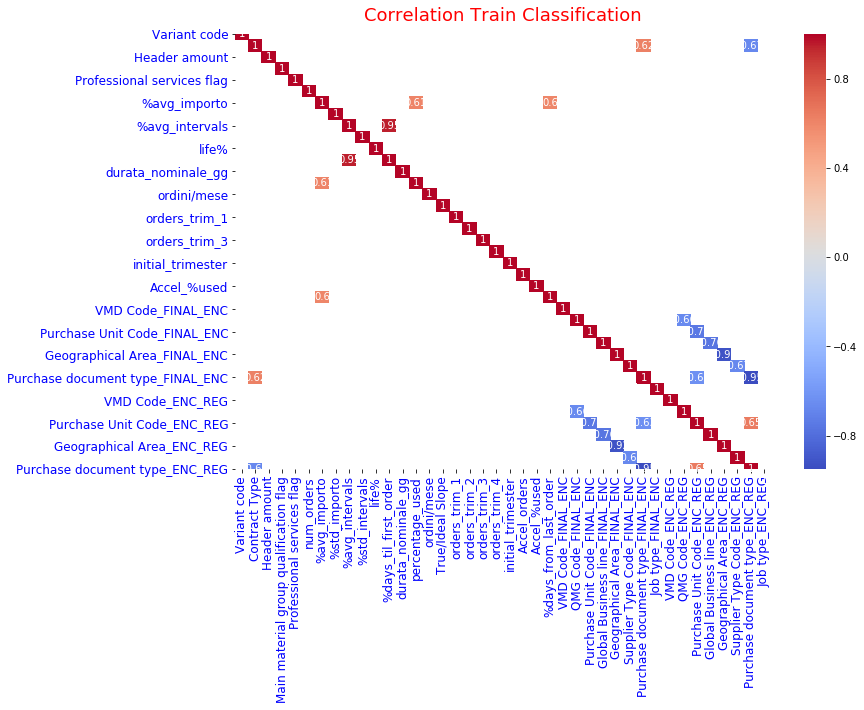

In [0]:
soglia = 0.6

title_ticks_ecc('Correlation Train Classification', '', '', figsize=(12, 8))
sns.heatmap(container_reg['X_train'].corr()[abs(container_reg['X_train'].corr())> soglia ], cmap= 'coolwarm', annot= True,)

In [0]:
container_reg['X_train'].shape, container_reg['X_test'].shape   # (232298, 25), (41158, 25)

((259053, 40), (45511, 40))

In [0]:
targets['class'][0]

10         97.81
11         97.81
12         97.81
13         97.81
14         97.81
           ...  
732520    100.00
732521    100.00
732522    100.00
732523    100.00
732524    100.00
Name: target_class, Length: 259053, dtype: float64

In [0]:
for task in ['class', 'reg']:
  for i in [0,1]:
    targets[task][i]= MinMaxScaler().fit_transform(np.array(targets[task][i]).reshape(-1,1))

ytrain_usage= pd.DataFrame(targets['class'][0]).squeeze()
ytest_usage= pd.DataFrame(targets['class'][1]).squeeze()

ytrain_life= pd.DataFrame(targets['reg'][0]).squeeze()
ytest_life= pd.DataFrame(targets['reg'][1]).squeeze()

In [0]:
targets['class'][0]

array([[0.9781],
       [0.9781],
       [0.9781],
       ...,
       [1.    ],
       [1.    ],
       [1.    ]])

In [0]:
ytest_usage.describe()

count    45511.000000
mean         0.580807
std          0.377901
min          0.000000
25%          0.195800
50%          0.695400
75%          0.939250
max          1.000000
Name: 0, dtype: float64

# 2 Outputs Trial

In [0]:
numerical_input= Input(shape=(container_reg['X_train'].shape[1],))
dense= Dense(5, activation='relu')(numerical_input)
output_life = Dense(1, activation= 'sigmoid', name='output_life')(dense)
output_usage= Dense(1, activation= 'sigmoid', name='output_usage')(dense)
model = Model(inputs= [numerical_input], outputs=[output_life, output_usage])
"""model.compile(optimizer='adam', loss='mean_squared_error',
              loss_weights=[1.0, 1.0], metrics= ['mae'])"""  #'mape' in percentuale utilizzo è altissimo perchè divido per y, che spesso è zero

model.compile(optimizer='adam',
              loss={'output_life': 'mean_squared_error', 'output_usage': 'mean_squared_error'},
              loss_weights={'output_life': 1.0, 'output_usage': 1.5},  metrics= ['mae'])   #do piu peso a usage

In [0]:
model.fit(X_train,
	{"output_life": ytrain_life, "output_usage": ytrain_usage},
	validation_data=(X_test,
		{"output_life": ytest_life, "output_usage": ytest_usage}),
	epochs=5,
	verbose=2)




Train on 259053 samples, validate on 45511 samples
Epoch 1/5





 - 10s - loss: 0.1655 - output_life_loss: 0.0318 - output_usage_loss: 0.0891 - output_life_mean_absolute_error: 0.0978 - output_usage_mean_absolute_error: 0.2326 - val_loss: 0.1435 - val_output_life_loss: 0.0272 - val_output_usage_loss: 0.0775 - val_output_life_mean_absolute_error: 0.0951 - val_output_usage_mean_absolute_error: 0.2159
Epoch 2/5
 - 11s - loss: 0.1437 - output_life_loss: 0.0261 - output_usage_loss: 0.0784 - output_life_mean_absolute_error: 0.0920 - output_usage_mean_absolute_error: 0.2160 - val_loss: 0.1425 - val_output_life_loss: 0.0264 - val_output_usage_loss: 0.0774 - val_output_life_mean_absolute_error: 0.0956 - val_output_usage_mean_absolute_error: 0.2149
Epoch 3/5
 - 10s - loss: 0.1423 - output_life_loss: 0.0256 - output_usage_loss: 0.0778 - output_life_mean_absolute_error: 0.0912 - output_usage_mean_absolute_error: 0.2146 - val_loss: 0.1410 - val_output_life_loss: 0.0262 - val_output_usage_loss: 

In [0]:
###################### Studio Errore di questo caso semplice ####################
index= np.arange(len(ytest_life))
preds= model.predict(X_test)
preds_life= pd.DataFrame(preds[0], index= index).squeeze()
preds_usage= pd.DataFrame(preds[1],  index= index).squeeze()

ytrain_life= pd.Series(ytrain_life.values,  np.arange(len(ytrain_life)) )
ytrain_usage= pd.Series(ytrain_usage.values,  np.arange(len(ytrain_life)) )

ytest_life= pd.Series(ytest_life.values,  index= index )
ytest_usage= pd.Series(ytest_usage.values,  index= index )

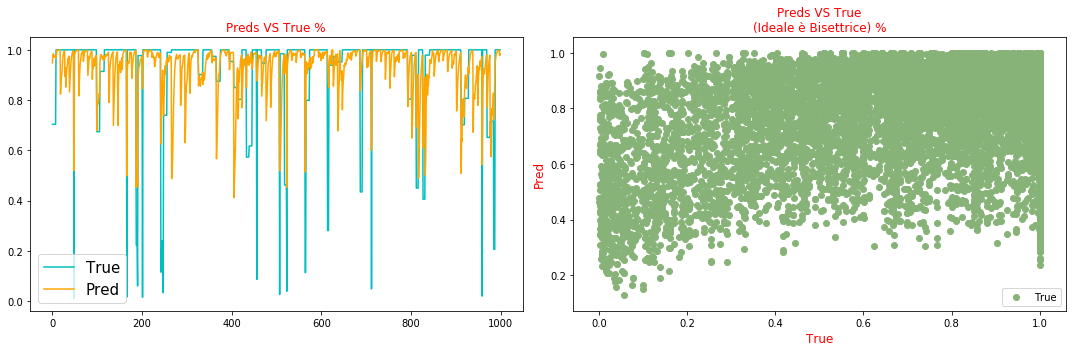

In [0]:
plot_preds_true(ytest_life, preds_life, single_model= True, plot_only_reg= False, n_to_show= 1000, diz_models= None, n_cols= 2)

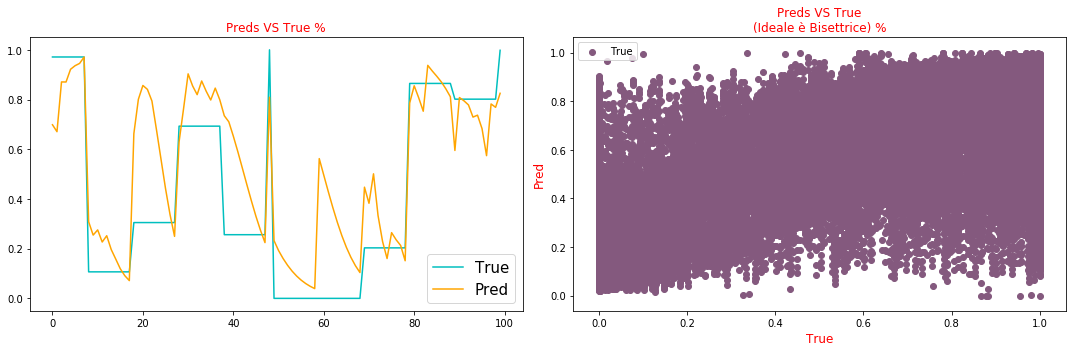

In [0]:
plot_preds_true(ytest_usage, preds_usage, single_model= True, plot_only_reg= False, n_to_show= 100, diz_models= None, n_cols= 2)

In [0]:
def MAPE(y_true, y_pred):   #
    """mean_absolute_percentage_error. Nel mio caso non ha senso, sono gia tutte percentuali. Se divido per y_true, 
    #ho quasi divisione per 0 a volte...perciò meglio MAE, che essendo su valori % funge praticamente da MAPE"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/ y_true)) *100
    
def summary_reg_model(model, X_train, X_test, task= 'usage', return_diz= False):
    
    pred_train= model.predict(X_train)
    pred_test= model.predict(X_test)
    if task== 'life':
      pred_train= pd.DataFrame(pred_train[0], index= np.arange(len(X_train))).squeeze()
      pred_test= pd.DataFrame(pred_test[0], index= np.arange(len(X_test))).squeeze()
      y_train= ytrain_life
      y_test= ytest_life
    elif task== 'usage':
      pred_train= pd.DataFrame(pred_train[1], index= np.arange(len(X_train))).squeeze()
      pred_test= pd.DataFrame(pred_test[0], index= np.arange(len(X_test))).squeeze()
      y_train= ytrain_usage
      y_test= ytest_usage

    diz={}
    diz['Train MAE']= round(100*mean_absolute_error(y_train, pred_train),3)
    diz['Test MAE'] =  round(100*mean_absolute_error(y_test, pred_test),3)
    diz['Train RMSE']= round(100*np.sqrt(mean_squared_error(y_train, pred_train)),3)
    diz['Test RMSE']=  round(100*np.sqrt(mean_squared_error(y_test, pred_test)),3)

    diz['Train MAPE']= round(MAPE((y_train, pred_train),3))
    diz['Test MAPE'] =  round(MAPE(y_test, pred_test),3)
    
    print('\t FOR OUTPUT \033[1m {} \033[0m, PERFORMANCES ARE: '.format(task.upper()))
    print('\n\033[1mtrain MAE is {} \033[0m'.format(diz['Train MAE']))
    print('\033[1mtest MAE is {} \033[0m'.format(diz['Test MAE']))
    
    print('\n\033[1mtrain RMSE is {} \033[0m'.format(diz['Train RMSE']))
    print('\033[1mtest RMSE is {} \033[0m'.format(diz['Test RMSE']))

    if task=='life':
      print('\n\033[1mtrain MAPE is {} \033[0m'.format(diz['Train MAPE']))
      print('\033[1mtest MAPE is {} \033[0m'.format(diz['Test MAPE']))

    if task=='usage':
      print('NB: MAPE sarà inf perchè viene diviso errore per il target e questo spesso è zero')

    if return_diz== True:
      return diz

In [0]:
summary_reg_model(model, X_train, X_test, task='life' )
summary_reg_model(model, X_train, X_test, task='usage' )

	 FOR OUTPUT  LIFE , PERFORMANCES ARE: 

train MAE is 9.21 
test MAE is 9.41 

train RMSE is 15.961 
test RMSE is 16.217 

train MAPE is inf 
test MAPE is inf 
	 FOR OUTPUT  USAGE , PERFORMANCES ARE: 

train MAE is 21.26 
test MAE is 42.451 

train RMSE is 27.798 
test RMSE is 54.651 
NB: MAPE sarà inf perchè viene diviso errore per il target e questo spesso è zero


In [0]:
####################################################################################################################################

In [0]:
dropout= 0.5

numerical_input= Input(shape=(container_reg['X_train'].shape[1],))
drop= Dropout(dropout)(numerical_input)
dense1= Dense(64, activation='relu')(drop)
drop= Dropout(dropout)(dense1)
dense2= Dense(32, activation='relu')(drop)
drop= Dropout(dropout)(dense2)
#dense3= Dense(16, activation='relu')(drop)
#drop= Dropout(dropout)(dense3)
output_life = Dense(1, activation= 'sigmoid', name='output_life')(drop)
output_usage= Dense(1, activation= 'sigmoid', name='output_usage')(drop)
model = Model(inputs= [numerical_input], outputs=[output_life, output_usage])
model.compile(optimizer='adam',
              loss={'output_life': 'mean_squared_error', 'output_usage': 'mean_squared_error'},
              loss_weights={'output_life': 1.0, 'output_usage': 1.0},  metrics= ['mae'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
history= model.fit(X_train,
	{"output_life": ytrain_life, "output_usage": ytrain_usage},
	validation_split= 0.2,         #oppure validation_data=(X_test,{"output_life": ytest_life, "output_usage": ytest_usage})
	epochs=50,
	verbose=2, batch_size= 1024)

Train on 207242 samples, validate on 51811 samples
Epoch 1/50
 - 2s - loss: 0.2390 - output_life_loss: 0.0636 - output_usage_loss: 0.1755 - output_life_mean_absolute_error: 0.1401 - output_usage_mean_absolute_error: 0.3366 - val_loss: 0.2084 - val_output_life_loss: 0.0749 - val_output_usage_loss: 0.1335 - val_output_life_mean_absolute_error: 0.1398 - val_output_usage_mean_absolute_error: 0.3098
Epoch 2/50
 - 1s - loss: 0.1643 - output_life_loss: 0.0350 - output_usage_loss: 0.1293 - output_life_mean_absolute_error: 0.0885 - output_usage_mean_absolute_error: 0.2965 - val_loss: 0.2042 - val_output_life_loss: 0.0758 - val_output_usage_loss: 0.1284 - val_output_life_mean_absolute_error: 0.1348 - val_output_usage_mean_absolute_error: 0.3074
Epoch 3/50
 - 1s - loss: 0.1475 - output_life_loss: 0.0335 - output_usage_loss: 0.1139 - output_life_mean_absolute_error: 0.0828 - output_usage_mean_absolute_error: 0.2821 - val_loss: 0.1917 - val_output_life_loss: 0.0704 - val_output_usage_loss: 0.1213 -

In [0]:
summary_reg_model(model, X_train, X_test, task='life' )
summary_reg_model(model, X_train, X_test, task='usage' )

	 FOR OUTPUT  LIFE , PERFORMANCES ARE: 

train MAE is 9.008 
test MAE is 9.176 

train RMSE is 16.67 
test RMSE is 16.885 

train MAPE is inf 
test MAPE is inf 
	 FOR OUTPUT  USAGE , PERFORMANCES ARE: 

train MAE is 24.426 
test MAE is 41.415 

train RMSE is 29.471 
test RMSE is 54.347 
NB: MAPE sarà inf perchè viene diviso errore per il target e questo spesso è zero


In [0]:
epochs= 50
def plot_model_history(history, measures = ["output_usage_mean_absolute_error", "output_life_mean_absolute_error", "loss"]):

  plt.style.use("ggplot")
  (fig, ax) = plt.subplots(1, 3, figsize=(20, 5))

  # loop over the accuracy names
  for (i, l) in enumerate(measures):
    # plot the loss for both the training and validation data
    ax[i].set_xlabel("Epoch #")
    if l!= 'loss':
      ax[i].set_title("{}".format('%'+ l.split('_')[1] ))
      ax[i].set_ylabel("MAE")
    else:
      ax[i].set_title("Average(MSE_usage, MSE_life)")
      ax[i].set_ylabel("Loss")
    #ax[i].plot(np.arange(0, epochs), history.history[l], label=l)
    #ax[i].plot(np.arange(0, epochs), history.history["val_" + l], label="val_" + l)
    ax[i].plot(history.history[l], label=l)
    ax[i].plot( history.history["val_" + l], label="val_" + l)
    ax[i].legend()

  plt.tight_layout() 
  plt.show()
  plt.close()

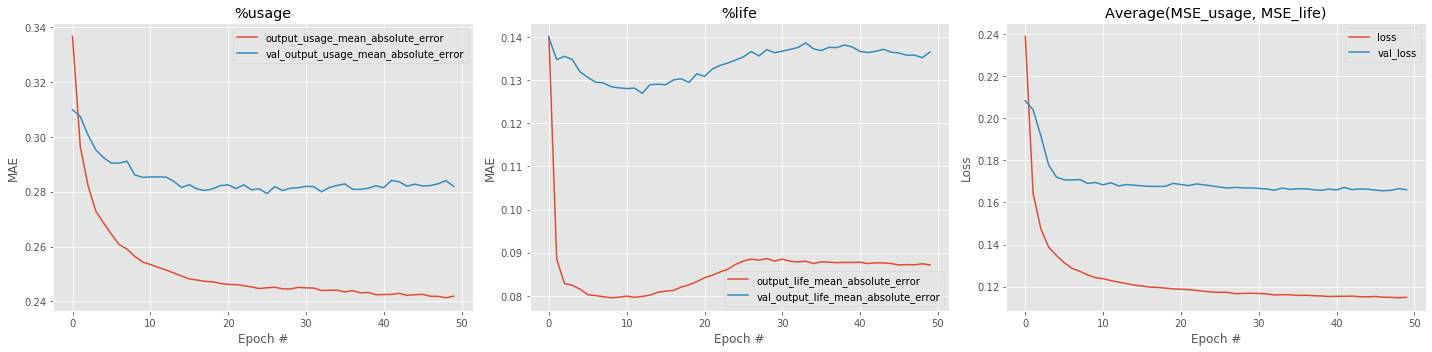

In [0]:
plot_model_history(history)

# <center>**TRADITIONAL NN with Double Output**

In [0]:
nodi_hiddens= [64,32,16,8]
dropout= 0.5
lr= 0.00001
n_layers= 1
loss_func= 'mean_squared_error'
metrics= ['mae']

def NN(nodi_hiddens= nodi_hiddens, dropout= dropout, lr= lr, n_layers= n_layers,
                loss_func= loss_func, metrics= metrics, loss_weights={'output_life': 1.0, 'output_usage': 1.0}):  #'mse', 'mae', 'mape'

  #diz_pre_model= create_embedded_inputs(X_train, X_test, max_emb_size=50, method= 'half')
  print('\n\033[1m Params modello: n_layers: {}, nodi_hiddens: {}, lr: {} \033[0m'.format(n_layers, nodi_hiddens, lr))
  numerical_input= Input(shape=(container_reg['X_train'].shape[1],))
  for i in range (n_layers):
    if i==0:
      drop= Dropout(dropout)(numerical_input)
      dense = Dense(nodi_hiddens[0], activation='relu')(drop)
    else:
      drop= Dropout(dropout)(dense)
      dense = Dense(nodi_hiddens[i], activation='relu')(drop)

  drop= Dropout(dropout)(dense)
  output_life = Dense(1, activation= 'sigmoid', name='output_life')(drop)
  output_usage= Dense(1, activation= 'sigmoid', name='output_usage')(drop)
  model = Model(inputs= [numerical_input], outputs=[output_life, output_usage])
  model.compile(optimizer='adam',
              loss={'output_life': 'mean_squared_error', 'output_usage': 'mean_squared_error'},
              loss_weights={'output_life': 1.0, 'output_usage': 1.0},  metrics= ['mae'])

  return model

In [0]:
batch_size, epochs= 32, 50

def run_model(model, param_grid= None, verbose=5, cv=3, n_jobs= None, return_single_mod= True, return_results=True, n_to_show= 1000,
              early= None, measures = ["output_usage_mean_absolute_error", "output_life_mean_absolute_error", "loss"], batch_size= batch_size, epochs= epochs): 
    """estimator è il modello, task puo essere: ['reg', 'reg']. \n
    Return Grid Search estimator. """
    
      #Naming Convention
    final_inputs_test= X_test
    final_inputs_train= X_train
    estimator= model

    temp=time.time()
      
    if param_grid is None:
      history= model.fit(X_train,
                {"output_life": ytrain_life, "output_usage": ytrain_usage},
                validation_split= 0.2,
                epochs=epochs,
                verbose=2, batch_size= batch_size, callbacks= [early])
        
    summaries= {}
    for task in ['usage', 'life']:
        summaries[task]= summary_reg_model(model, X_train, X_test, task= task, return_diz= True)

        pred_train= model.predict(X_train)
        pred_test= model.predict(X_test)
        if task== 'life':
          pred_train= pd.DataFrame(pred_train[0], index= np.arange(len(X_train))).squeeze()
          pred_test= pd.DataFrame(pred_test[0], index= np.arange(len(X_test))).squeeze()
          y_train= ytrain_life
          y_test= ytest_life
        elif task== 'usage':
          pred_train= pd.DataFrame(pred_train[1], index= np.arange(len(X_train))).squeeze()
          pred_test= pd.DataFrame(pred_test[0], index= np.arange(len(X_test))).squeeze()
          y_train= ytrain_usage
          y_test= ytest_usage

        plot_preds_true(y_test, pred_test, single_model= True, plot_only_reg= False, n_to_show= n_to_show, diz_models= None, n_cols= 2, task= task)
    
    plot_model_history(history, measures= measures)
    print('execution time (min)=', round((time.time()-temp)/60, 1), ' finished at ', datetime.today())

    return [history, summaries]

run_reg_model= run_model

In [0]:
not_used_train= X_train.loc[X_train['label']== 0]['Purchase document']
not_used_test= X_test.loc[X_test['label']== 0]['Purchase document']

used_train= X_train.loc[X_train['label']== 1]['Purchase document']
used_test= X_test.loc[X_test['label']== 1]['Purchase document']

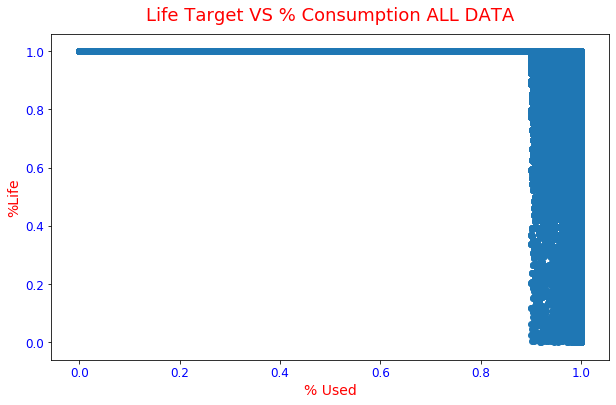

In [0]:
title_ticks_ecc('Life Target VS % Consumption ALL DATA', '% Used', '%Life')
plt.scatter(ytrain_usage, ytrain_life)  #Interpetazione: per %utilizzo= 0, 

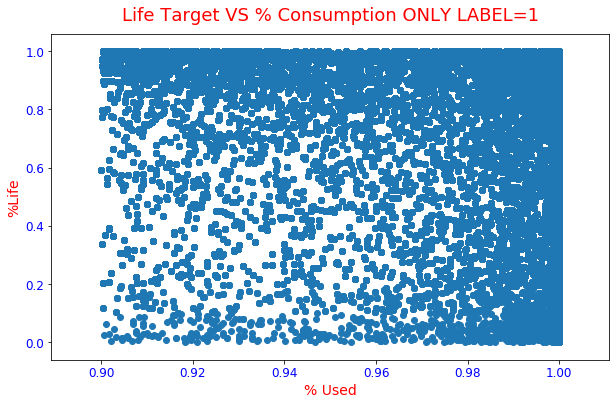

In [0]:
title_ticks_ecc('Life Target VS % Consumption ONLY LABEL=1', '% Used', '%Life')
plt.scatter(ytrain_usage.loc[used_train], ytrain_life.loc[used_train])  #Interpetazione: per %utilizzo= 0, 

In [0]:
early = EarlyStopping(monitor='val_loss', mode='min', verbose=4, patience=5, min_delta= 0.1/100) #

param_grid = dict(
        n_layers= [1,3],
        nodi_hiddens= [[64,32,16,8], [256,128,32,8]],
        epochs= [100],
        batch_size= [256, 1024],
        dropout= [0.5] ,
        lr= [1e-03],
        loss_weights= [{'output_life': 1.0, 'output_usage': 1.5}])

l=[]
iteration=1

for diz in list(ParameterGrid(param_grid)):
  print('\n\t ITERAZIONE {}/{}'.format(iteration, len(list(ParameterGrid(param_grid)))))
  n_layers= diz['n_layers']
  nodi_hiddens= diz['nodi_hiddens']
  batch_size= diz['batch_size']
  dropout= diz['dropout']
  epochs= diz['epochs']
  lr= diz['lr']
  print('\n\033[1m n_layers: {}, batch_size: {}, dropout: {}, lr: {} \033[0m'.format(n_layers, batch_size, dropout, lr))
  for i in range(n_layers):
      print('\033[1m nodi_hidden{} : {} \033[0m'.format(str(i+1), str(nodi_hiddens[i]) ))
  
  #nn = KerasRegressor(build_fn= NN, epochs=epochs, batch_size=batch_size, verbose=2)
  nn= NN(nodi_hiddens= nodi_hiddens, dropout= dropout, lr= lr, n_layers= n_layers,
                loss_func= loss_func, metrics= ['mae'])
  
  history_one= run_model(nn, early= early, batch_size= batch_size, epochs= epochs)

  l.append(history_one)
  iteration+=1

In [0]:
l

[[<keras.callbacks.History at 0x7fdef8135898>,
  {'life': {'Test MAE': 9.704,
    'Test MAPE': inf,
    'Test RMSE': 16.819,
    'Train MAE': 9.507,
    'Train MAPE': inf,
    'Train RMSE': 16.593},
   'usage': {'Test MAE': 40.99,
    'Test MAPE': inf,
    'Test RMSE': 53.683,
    'Train MAE': 24.771,
    'Train MAPE': inf,
    'Train RMSE': 29.65}}],
  {'life': {'Test MAE': 10.103,
    'Test MAPE': inf,
    'Test RMSE': 16.535,
    'Train MAE': 9.881,
    'Train MAPE': inf,
    'Train RMSE': 16.322},
   'usage': {'Test MAE': 41.188,
    'Test MAPE': inf,
    'Test RMSE': 53.596,
    'Train MAE': 24.32,
    'Train MAPE': inf,
    'Train RMSE': 29.442}}],
  {'life': {'Test MAE': 9.35,
    'Test MAPE': inf,
    'Test RMSE': 17.356,
    'Train MAE': 9.172,
    'Train MAPE': inf,
    'Train RMSE': 17.12},
   'usage': {'Test MAE': 41.138,
    'Test MAPE': inf,
    'Test RMSE': 54.509,
    'Train MAE': 24.618,
    'Train MAPE': inf,
    'Train RMSE': 29.652}}],
  {'life': {'Test MAE': 9.101,

In [0]:
def results_hand_grid( lista_histories= l, param_grid= param_grid, task= 'usage',
                      columns= ['n_layers', 'nodi_hiddens', 'batch_size', 'dropout', 'lr', 'Train MAE', 'Test MAE', 'Train RMSE', 'Test RMSE']):

  iteraz=0
  
  results_emb_1h= pd.DataFrame(columns= columns )

  for diz in list(ParameterGrid(param_grid)):
    res= lista_histories[iteraz][1][task]

    df= pd.DataFrame([
    diz['n_layers'],
    diz['nodi_hiddens'],
    diz['batch_size'],
    diz['dropout'],
    diz['lr'],
    res['Train MAE'],
    res['Test MAE'],
    res['Train RMSE'],
    res['Test RMSE'] ]).T                    #"""res['Train MAE'] , res['Test MAE'],res['Train RMSE'] , res['Test RMSE'],"""

    df.columns= columns
    
    #print(df)
    results_emb_1h= results_emb_1h.append(df, ignore_index=True)

    iteraz+=1
  return results_emb_1h.sort_values(by= ['Test RMSE', 'Test MAE'], ascending= True)

In [0]:
def analisi_errore_reg( best_respect_to= 'life', return_df_grids= True,
                       columns= ['n_layers', 'nodi_hiddens','batch_size', 'dropout', 'Train MAE', 'Test MAE', 'Train RMSE', 'Test RMSE'], n_to_show= 3,
                       measures = ["output_usage_mean_absolute_error", "output_life_mean_absolute_error", "loss"], X_test=final_padded_test ,lista_histories= l,):
  
  models= []
  for task in ['life', 'usage']:
    models.append(results_hand_grid( lista_histories= l, param_grid= param_grid, columns= columns, task= task))

  if best_respect_to== 'life':
    #print('Best index: ', models[0].index[0])
    best_history=lista_histories[ models[0].index[0]][0]
  elif best_respect_to== 'usage':
    best_history= lista_histories[ models[1].index[0]][0]

  ############### Metrics e Loss###################
  plot_model_history(best_history, measures= measures)

  best_model= best_history.model
  preds= best_model.predict(X_test )  
  preds_life, preds_usage= pd.DataFrame(preds[0]).squeeze(), pd.DataFrame(preds[1]).squeeze()

  ############### plot 'Time Series' e Bisettrice###################
  for task in ['life', 'usage']:
    if task== 'life':
      ytest= ytest_life
      preds= preds_life
    elif task== 'usage':
      ytest= ytest_usage
      preds= preds_usage
    plot_preds_true( ytest, preds, task='life', plot_only_reg= False)

  ############# Contradditori ####################
  contraddittori= pd.DataFrame()
  contraddittori['preds_life']= preds_life
  contraddittori['preds_usage']= preds_usage

  len_test= container_reg['X_test'].shape[0]
  contraddittori= contraddittori[(contraddittori['preds_life']< 1) & (contraddittori['preds_usage']< 0.9 )]
  perc_contraddittori= round(100*contraddittori.shape[0]/len_test, 2)
  title_ticks_ecc('PREDETTI NON UTILIZZATI MA VITA INFERIORE. \n Sono il {} % dei casi sul test :(((' .format(perc_contraddittori), 'Pred Utilizzo', 'Pred Life')
  sns.scatterplot(x= contraddittori['preds_usage'], y= contraddittori['preds_life'])
  plt.xticks(np.arange(0, 1.01, 0.3))


  ############# Errore rispetto a durata nominale #########################
  delta_preds_life = pd.DataFrame()
  delta_preds_life['durata_nominale_gg']= container_reg['X_test']['durata_nominale_gg']
  delta_preds_life['True_life']= ytest_life.values
  delta_preds_life['preds_life']= preds_life.values

  delta_preds_life['delta errore %']= abs(delta_preds_life['True_life']- delta_preds_life['preds_life'])

  title_ticks_ecc('DURATA NOMINALE VS DELTA ERRORE % VITA', 'Durata Nominale', 'Pred % Life')
  sns.scatterplot(delta_preds_life['durata_nominale_gg'], delta_preds_life['delta errore %'])



  if return_df_grids is True:
    return models

In [0]:
columns= ['n_layers', 'nodi_hiddens', 'batch_size', 'dropout', 'lr',] #'Train MAE', 'Test MAE', 'Train RMSE', 'Test RMSE']
results_hand_grid(l, param_grid, columns )

,n_layers,nodi_hiddens,batch_size,dropout,lr,Train MAE,Test MAE,Train RMSE,Test RMSE
5,1,"[256, 128, 32, 8]",1024,0.5,0.001,9.821,10.046,16.317,16.51
1,1,"[256, 128, 32, 8]",256,0.5,0.001,9.881,10.103,16.322,16.535
3,3,"[256, 128, 32, 8]",256,0.5,0.001,8.922,9.101,16.509,16.733
7,3,"[256, 128, 32, 8]",1024,0.5,0.001,8.848,9.046,16.505,16.748
4,1,"[64, 32, 16, 8]",1024,0.5,0.001,9.05,9.231,16.588,16.815
0,1,"[64, 32, 16, 8]",256,0.5,0.001,9.507,9.704,16.593,16.819
2,3,"[64, 32, 16, 8]",256,0.5,0.001,9.172,9.35,17.12,17.356
6,3,"[64, 32, 16, 8]",1024,0.5,0.001,8.203,8.308,20.918,21.138


In [0]:
l[5]

 {'life': {'Test MAE': 10.046,
   'Test MAPE': inf,
   'Test RMSE': 16.51,
   'Train MAE': 9.821,
   'Train MAPE': inf,
   'Train RMSE': 16.317},
  'usage': {'Test MAE': 41.405,
   'Test MAPE': inf,
   'Test RMSE': 53.775,
   'Train MAE': 24.401,
   'Train MAPE': inf,
   'Train RMSE': 29.543}}]

In [0]:
l[5][0].model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 40)           0                                            
__________________________________________________________________________________________________
dropout_18 (Dropout)            (None, 40)           0           input_8[0][0]                    
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 256)          10496       dropout_18[0][0]                 
__________________________________________________________________________________________________
dropout_19 (Dropout)            (None, 256)          0           dense_13[0][0]                   
____________________________________________________________________________________________

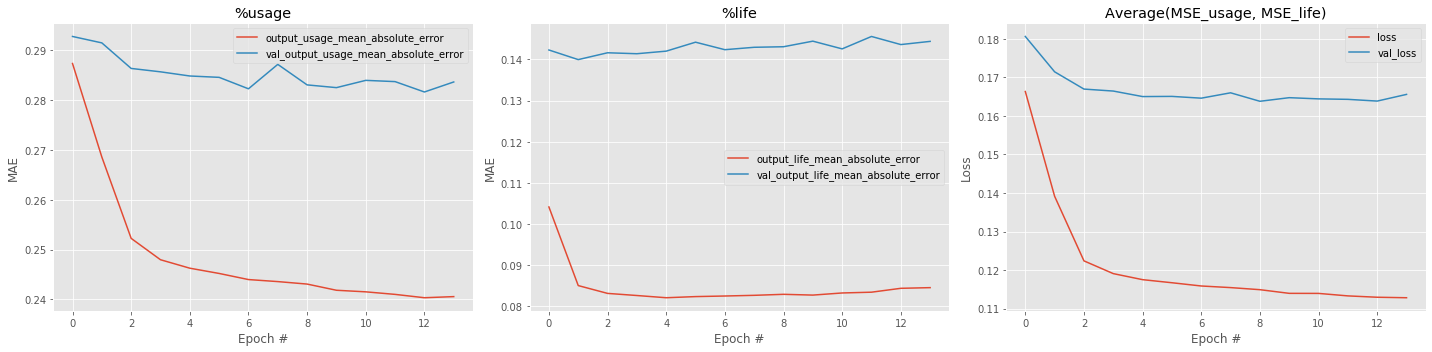

In [0]:
winner_1run = l[5][0]
plot_model_history(winner_1run)

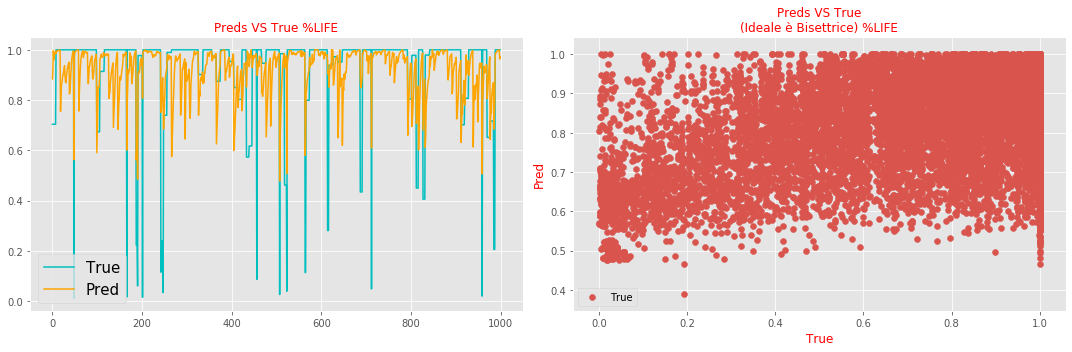

In [0]:
plot_preds_true( ytest_life, winner_1run.model.predict(container_reg['X_test'])[0], task='life', plot_only_reg= False)

# <center> **RECURRENT NEURAL NETWORKS WITH DOUBLE OUTPUT**

In [0]:
max_len= pd.Series(X_train.index).value_counts().max()
num_feats= container_reg['X_train'].shape[1]

max_len== 10, num_feats== 40

(True, True)

In [0]:
#@title
def preprocess_X_rnn(X, max_len= max_len, show_print= False):

  unique_contr= pd.Series(X.index).unique()
  contr_counts= X.reset_index()['Purchase document'].value_counts()
  contr_counts

  sequenze= []
  for contr in unique_contr:
    n_snapshots= contr_counts.loc[contr]
    sequenze.append(n_snapshots)  #vanno nello stesso ordine dei contratti

  sequences_order= sequenze
  cumsum= np.array(sequences_order).cumsum()

  df= X.copy()

  max_len= max_len  #lunghezza massima della serie
  train_sequences= []

  for i in range(len(sequences_order)):
    if i==0:
      seq_len= sequences_order[i]
      seq= df.iloc[:seq_len]  #prendo tutte da inizio fino al limite della 1° sequenza
      train_sequences.append(seq)
      #print('zero')
    elif i>0: #and i+1< len(sequences_order):  #se non è l ultimo
      previous_seq_len= cumsum[i-1]
      seq_len= sequences_order[i]
      #print(previous_seq_len, seq_len)
      seq= df.iloc[previous_seq_len: cumsum[i]]  #prendo tutte da inizio fino al limite della 1° sequenza
      train_sequences.append(seq)

  seqs_not_padded= []

  for col in df.columns:
    if show_print:
      print('...performing sequences for', col, '...')
    seq_col= []
    iteraz= 0
    for blocco in train_sequences:
      #print('lunghezza blocco: ', len(blocco))
      for i in range(len(blocco)):
        if i==0: #alla prima botta
          try: 
            current_list= [blocco[col].iloc[i]]
            #print('first list is: ',current_list)
            seq_col.append(current_list)
            #print('first durate is:',durate)
          except:
            print('Non riuscito')
        elif i>0: 
          #print('i:',i, 'iterazione', iteraz)
          #print('durate senza append is: ', durate)
          previous_list= seq_col[iteraz+i-1]
          #print('previous_list', previous_list)
          current_number= blocco[col].iloc[i]
          #print('current_number', current_number)
          current_list= previous_list.copy()  #senza il .copy(), mi modificava anche la lista precedente
          current_list.append(current_number)
          #print('current_list', current_list)
          seq_col.append(current_list)
          #print('durate', durate)
    iteraz+= len(blocco)  #alla fine di ogni blocco
    seqs_not_padded.append(seq_col)

  padded_seqs= seqs_not_padded.copy()  #lunghezza massima della serie

  for i in range(len(seqs_not_padded)): #25, per ogni feature
    padded_seqs[i]= pad_sequences(seqs_not_padded[i], maxlen = max_len, padding = 'pre',  dtype= 'float64')  

  final_padded= []
  for i in range(len(X)): #scorro tutti i dati
    #metto il primo paddato di ogni riga per ogni colonna
    lista_9_25= [[padded_seqs[col_index][i][0] for col_index in range(0, num_feats)]]  #dovra diventare una 9x25, ognuno è 1x25, lo faro per altre 8 volte. 

    for j in range(1, max_len):
      lista_9_25.append([padded_seqs[col_index][i][j] for col_index in range(0,num_feats)])

    final_padded.append(np.array(lista_9_25))

  final_padded= np.array(final_padded)
  print(final_padded.shape)  #deve essere (67854, 9, 25), cioè 67854 samples, 9 timesteps e 25 features
        
  return final_padded  

In [0]:
final_padded_train= preprocess_X_rnn(X_train, show_print= True)  #(259053, 10, 40)

...performing sequences for Variant code ...
...performing sequences for Contract Type ...
...performing sequences for Header amount ...
...performing sequences for Main material group qualification flag ...
...performing sequences for Professional services flag ...
...performing sequences for num_orders ...
...performing sequences for %avg_importo ...
...performing sequences for %std_importo ...
...performing sequences for %avg_intervals ...
...performing sequences for %std_intervals ...
...performing sequences for life% ...
...performing sequences for %days_til_first_order ...
...performing sequences for durata_nominale_gg ...
...performing sequences for percentage_used ...
...performing sequences for ordini/mese ...
...performing sequences for True/Ideal Slope ...
...performing sequences for orders_trim_1 ...
...performing sequences for orders_trim_2 ...
...performing sequences for orders_trim_3 ...
...performing sequences for orders_trim_4 ...
...performing sequences for initial_tr

In [0]:
final_padded_test= preprocess_X_rnn(X_test)
X_test.shape, final_padded_test.shape  #((45511, 40), (45511, 10, 40))

(45511, 10, 40)


((45511, 40), (45511, 10, 40))

In [0]:
model_type= 'gru', ## or lstm
nodi_hiddens= [64,32,16,8]
with_dropout=True  
dropout= 0.5
lr= 0.00001
n_layers= 1
loss_weights={'output_life': 1.0, 'output_usage': 1.0}

def NN_GRU(nodi_hiddens= nodi_hiddens, dropout= dropout, lr= lr, n_layers= n_layers, loss_func= 'mean_squared_error', metrics= ['mae'],
        loss_weights= loss_weights): 

  #diz_pre_model= create_embedded_inputs(X_train, X_test, max_emb_size=50, method= 'half')
  print('\n\033[1m Params modello: n_layers: {}, nodi_hiddens: {}, lr: {} \033[0m'.format(n_layers, nodi_hiddens, lr))
  numerical_input= Input(shape=final_padded_train.shape[1:] )
  for i in range (n_layers):
    if i==0:
      if n_layers== 1:   #SUPER IMPORTANTE: CON 1 SOLO HIDDEN LAYER DEVO METTERE FALSE, SENNO NON GLI TORNANO LE SHAPES....
        gru1 = GRU(nodi_hiddens[0], return_sequences = False)(numerical_input)
        drop= Dropout(dropout)(gru1)
      elif n_layers>1:
        gru1 = GRU(nodi_hiddens[0], return_sequences = True)(numerical_input)
        drop= Dropout(dropout)(gru1)
    else:
      gru = GRU(nodi_hiddens[i], return_sequences = False)(drop)
      drop= Dropout(dropout)(gru)

  output_life = Dense(1, activation= 'sigmoid', name='output_life')(drop)
  output_usage= Dense(1, activation= 'sigmoid', name='output_usage')(drop)
  model = Model(inputs= [numerical_input], outputs=[output_life, output_usage])  #PROVARE: model = Model(inputs= numerical_input, outputs=[output_life, output_usage])
  model.compile(optimizer= optimizers.Adam(lr= lr, ),
              loss={'output_life': 'mean_squared_error', 'output_usage': 'mean_squared_error'},
              loss_weights= loss_weights,  metrics= metrics)
  
  return model

In [0]:
nn_prova = NN_GRU(n_layers= 1)


 Params modello: n_layers: 1, nodi_hiddens: [64, 32, 16, 8], lr: 1e-05 


In [0]:
nn_prova.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 10, 40)       0                                            
__________________________________________________________________________________________________
gru_1 (GRU)                     (None, 64)           20160       input_11[0][0]                   
__________________________________________________________________________________________________
dropout_28 (Dropout)            (None, 64)           0           gru_1[0][0]                      
__________________________________________________________________________________________________
output_life (Dense)             (None, 1)            65          dropout_28[0][0]                 
___________________________________________________________________________________________

In [0]:
history= nn_prova.fit( final_padded_train,
                {"output_life": ytrain_life, "output_usage": ytrain_usage}, batch_size= 1024)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/1
259053/259053 [==============================] - 19s 72us/step - loss: 0.3916 - output_life_loss: 0.1530 - output_usage_loss: 0.2386 - output_life_mean_absolute_error: 0.3374 - output_usage_mean_absolute_error: 0.4229


In [0]:
def run_model_RNN(model, param_grid= None, verbose=5, cv=3, n_jobs= None, return_single_mod= True, return_results=True, n_to_show= 1000, summary= True,
              early= None, measures = ["output_usage_mean_absolute_error", "output_life_mean_absolute_error", "loss"], batch_size= 64, epochs= 50, random=False): 
    """estimator è il modello, task puo essere: ['reg', 'reg']. \n
    Return Grid Search estimator. """
    
      #Naming Convention
    X_test= final_inputs_test= final_padded_test
    X_train= final_inputs_train= final_padded_train
    estimator= model

    temp=time.time()
      
    if param_grid is None:
      if early is None:
        history= model.fit(X_train,
                  {"output_life": ytrain_life, "output_usage": ytrain_usage},
                  validation_split= 0.2,
                  epochs=epochs,
                  verbose=2, batch_size= batch_size)
        plot_model_history(history, measures= measures, epochs= epochs)
        
      else:
        history= model.fit(X_train,
                  {"output_life": ytrain_life, "output_usage": ytrain_usage},
                  validation_split= 0.2,
                  epochs=epochs,
                  verbose=2, batch_size= batch_size, callbacks= [early])
        plot_model_history(history, measures= measures)
        
    summaries= {}
    for task in ['usage', 'life']:
        summaries[task]= summary_reg_model(model, X_train, X_test, task= task, return_diz= True)

        pred_train= model.predict(X_train)
        pred_test= model.predict(X_test)
        if task== 'life':
          pred_train= pd.DataFrame(pred_train[0], index= np.arange(len(X_train))).squeeze()
          pred_test= pd.DataFrame(pred_test[0], index= np.arange(len(X_test))).squeeze()
          y_train= ytrain_life
          y_test= ytest_life
        elif task== 'usage':
          pred_train= pd.DataFrame(pred_train[1], index= np.arange(len(X_train))).squeeze()
          pred_test= pd.DataFrame(pred_test[0], index= np.arange(len(X_test))).squeeze()
          y_train= ytrain_usage
          y_test= ytest_usage

        plot_preds_true(y_test, pred_test, single_model= True, plot_only_reg= False, n_to_show= n_to_show, diz_models= None, n_cols= 2)
        plt.title('PLOT PER TASK % {}'.format(task))
      
    print('execution time (min)=', round((time.time()-temp)/60, 1), ' finished at ', datetime.today())

    return [history, summaries]


	 ITERAZIONE 1/2

 n_layers: 2, batch_size: 128, dropout: 0.5, lr: 0.001 
 nodi_hidden1 : 64 
 nodi_hidden2 : 64 

 Params modello: n_layers: 2, nodi_hiddens: [64, 64], lr: 0.001 
Train on 207242 samples, validate on 51811 samples
Epoch 1/20
 - 49s - loss: 0.1053 - output_life_loss: 0.0243 - output_usage_loss: 0.0809 - output_life_mean_absolute_error: 0.0895 - output_usage_mean_absolute_error: 0.2225 - val_loss: 0.1549 - val_output_life_loss: 0.0426 - val_output_usage_loss: 0.1123 - val_output_life_mean_absolute_error: 0.1337 - val_output_usage_mean_absolute_error: 0.2593
Epoch 2/20
 - 44s - loss: 0.0933 - output_life_loss: 0.0219 - output_usage_loss: 0.0714 - output_life_mean_absolute_error: 0.0831 - output_usage_mean_absolute_error: 0.2038 - val_loss: 0.1529 - val_output_life_loss: 0.0426 - val_output_usage_loss: 0.1103 - val_output_life_mean_absolute_error: 0.1299 - val_output_usage_mean_absolute_error: 0.2573
Epoch 3/20
 - 44s - loss: 0.0917 - output_life_loss: 0.0214 - output_usa

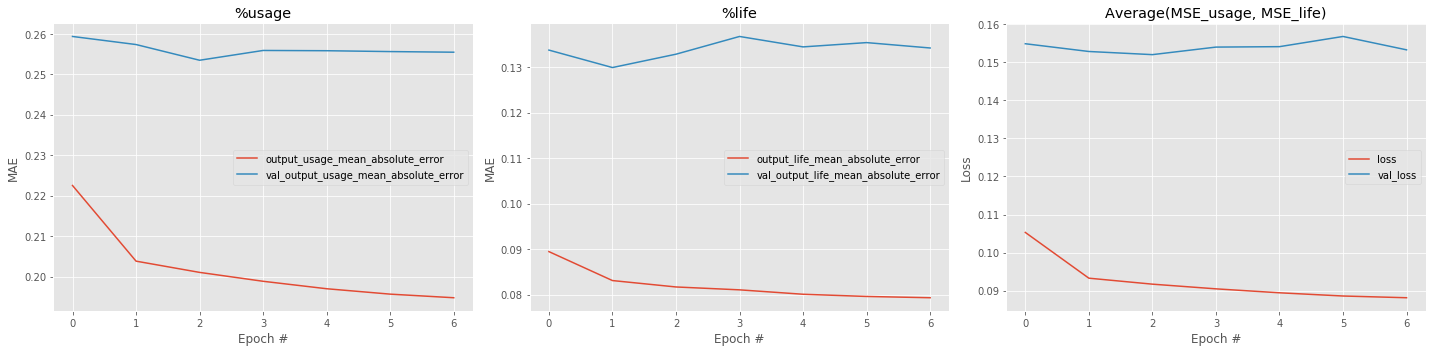

	 FOR OUTPUT  USAGE , PERFORMANCES ARE: 

train MAE is 20.119 
test MAE is 41.248 

train RMSE is 27.112 
test RMSE is 53.649 
NB: MAPE sarà inf perchè viene diviso errore per il target e questo spesso è zero
	 FOR OUTPUT  LIFE , PERFORMANCES ARE: 

train MAE is 8.72 
test MAE is 9.886 

train RMSE is 15.516 
test RMSE is 16.377 

train MAPE is inf 
test MAPE is inf 
execution time (min)= 7.4  finished at  2019-11-14 00:01:01.807889

	 ITERAZIONE 2/2

 n_layers: 2, batch_size: 128, dropout: 0.5, lr: 0.001 
 nodi_hidden1 : 16 
 nodi_hidden2 : 16 

 Params modello: n_layers: 2, nodi_hiddens: [16, 16], lr: 0.001 
Train on 207242 samples, validate on 51811 samples
Epoch 1/20
 - 27s - loss: 0.1274 - output_life_loss: 0.0314 - output_usage_loss: 0.0960 - output_life_mean_absolute_error: 0.1043 - output_usage_mean_absolute_error: 0.2530 - val_loss: 0.1626 - val_output_life_loss: 0.0474 - val_output_usage_loss: 0.1152 - val_output_life_mean_absolute_error: 0.1238 - val_output_usage_mean_absolu

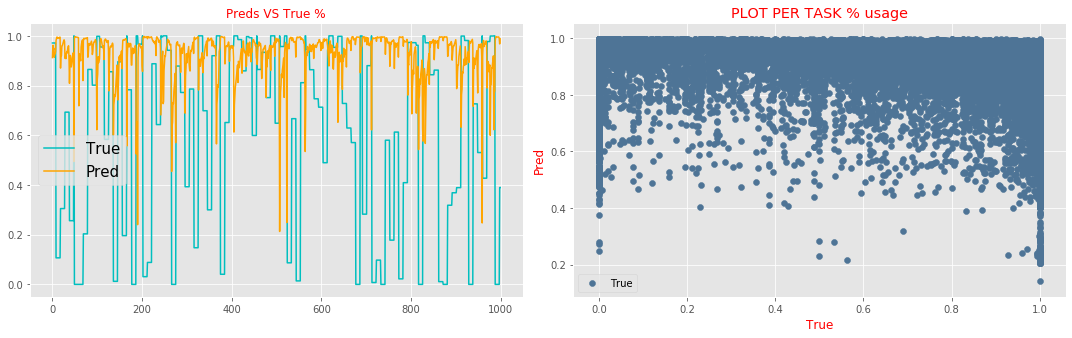

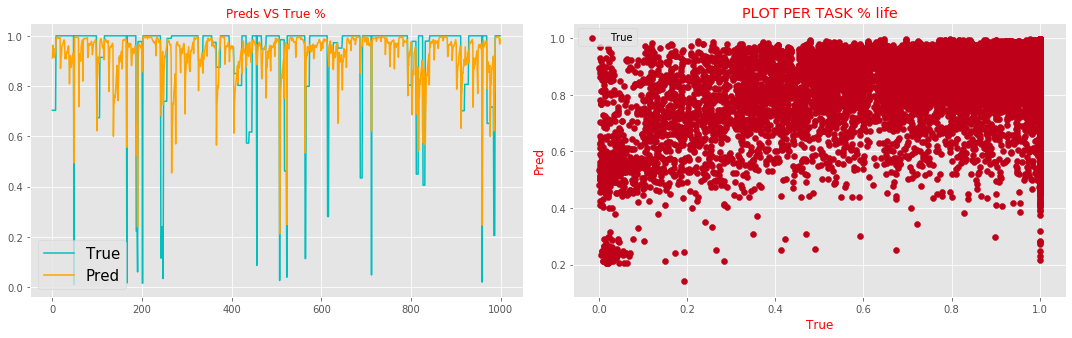

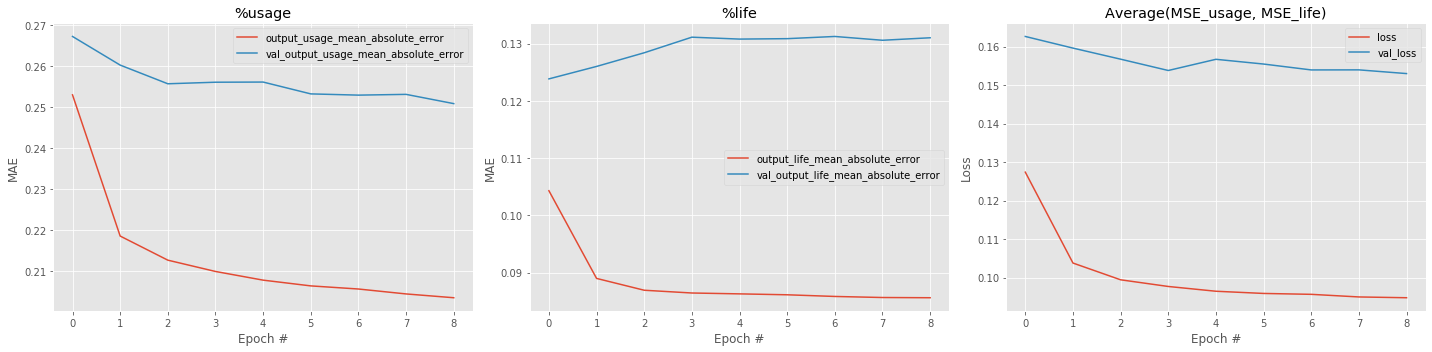

	 FOR OUTPUT  USAGE , PERFORMANCES ARE: 

train MAE is 20.106 
test MAE is 40.373 

train RMSE is 27.302 
test RMSE is 53.356 
NB: MAPE sarà inf perchè viene diviso errore per il target e questo spesso è zero
	 FOR OUTPUT  LIFE , PERFORMANCES ARE: 

train MAE is 9.044 
test MAE is 10.65 

train RMSE is 15.891 
test RMSE is 16.588 

train MAPE is inf 
test MAPE is inf 
execution time (min)= 5.2  finished at  2019-11-14 00:06:16.395496


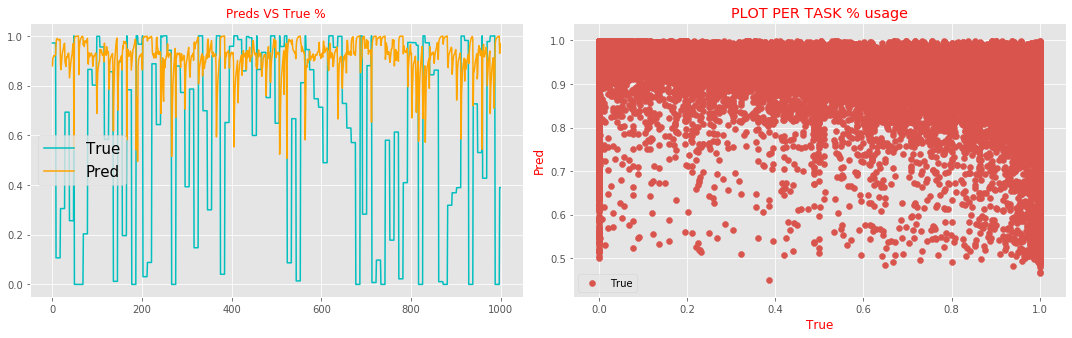

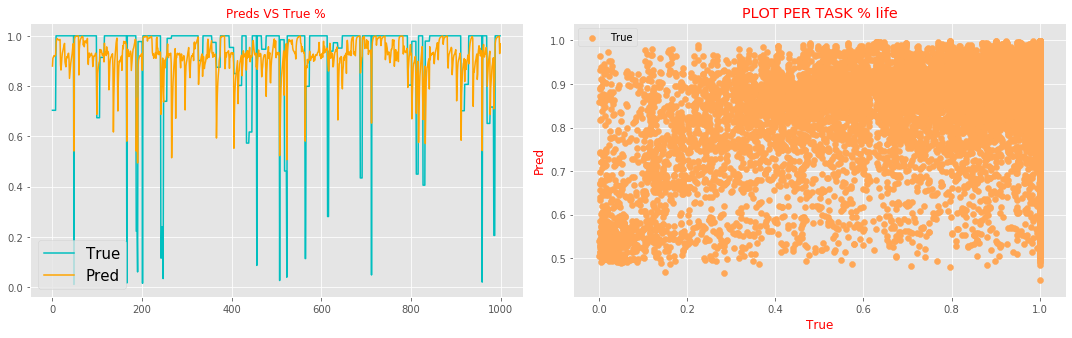

In [0]:
early = EarlyStopping(monitor='val_loss', mode='min', verbose=4, patience=5, min_delta= 0.1/100) #

param_grid = dict(
        n_layers= [2],
        nodi_hiddens= [[64,64], [16,16]], #[256,128,32,8]
        epochs= [20],
        batch_size= [128],
        dropout= [0.5] ,
        lr= [1e-03],
        loss_weights= [{'output_life': 1.0, 'output_usage': 1.5}])

l=[]
iteration=1

for diz in list(ParameterGrid(param_grid)):
  print('\n\t ITERAZIONE {}/{}'.format(iteration, len(list(ParameterGrid(param_grid)))))
  n_layers= diz['n_layers']
  nodi_hiddens= diz['nodi_hiddens']
  batch_size= diz['batch_size']
  dropout= diz['dropout']
  epochs= diz['epochs']
  lr= diz['lr']
  print('\n\033[1m n_layers: {}, batch_size: {}, dropout: {}, lr: {} \033[0m'.format(n_layers, batch_size, dropout, lr))
  for i in range(n_layers):
      print('\033[1m nodi_hidden{} : {} \033[0m'.format(str(i+1), str(nodi_hiddens[i]) ))
  
  #nn = KerasRegressor(build_fn= NN, epochs=epochs, batch_size=batch_size, verbose=2)
  nn= NN_GRU(nodi_hiddens= nodi_hiddens, dropout= dropout, lr= lr, n_layers= n_layers,
                loss_weights= loss_weights, metrics= ['mae'])
  
  history_one= run_model_RNN(nn, early= early, batch_size= batch_size, epochs= epochs)

  l.append(history_one)
  iteration+=1

In [0]:
#@title
def results_hand_grid( lista_histories= l, param_grid= param_grid, task= 'usage',
                      columns= ['n_layers', 'nodi_hiddens', 'batch_size', 'dropout', 'lr', 'Train MAE', 'Test MAE', 'Train RMSE', 'Test RMSE']):

  iteraz=0
  
  results_emb_1h= pd.DataFrame(columns= columns )

  for diz in list(ParameterGrid(param_grid)):
    res= lista_histories[iteraz][1]['life']

    df= pd.DataFrame([
    diz['n_layers'],
    diz['nodi_hiddens'],
    diz['batch_size'],
    diz['dropout'],
    diz['lr'],
    res['Train MAE'],
    res['Test MAE'],
    res['Train RMSE'],
    res['Test RMSE'] ]).T                    #"""res['Train MAE'] , res['Test MAE'],res['Train RMSE'] , res['Test RMSE'],"""

    df.columns= columns
    
    #print(df)
    results_emb_1h= results_emb_1h.append(df, ignore_index=True)

    iteraz+=1
  return results_emb_1h.sort_values(by= ['Test RMSE', 'Test MAE'], ascending= True)

In [0]:
l[0]

 {'life': {'Test MAE': 9.886,
   'Test MAPE': inf,
   'Test RMSE': 16.377,
   'Train MAE': 8.72,
   'Train MAPE': inf,
   'Train RMSE': 15.516},
  'usage': {'Test MAE': 41.248,
   'Test MAPE': inf,
   'Test RMSE': 53.649,
   'Train MAE': 20.119,
   'Train MAPE': inf,
   'Train RMSE': 27.112}}]

In [0]:
columns= ['n_layers', 'nodi_hiddens', 'batch_size', 'dropout', 'lr',] #'Train MAE', 'Test MAE', 'Train RMSE', 'Test RMSE']
results_hand_grid(l, param_grid, columns )

,n_layers,nodi_hiddens,batch_size,dropout,lr,Train MAE,Test MAE,Train RMSE,Test RMSE
0,2,"[64, 64]",128,0.5,0.001,8.72,9.886,15.516,16.377
1,2,"[16, 16]",128,0.5,0.001,9.044,10.65,15.891,16.588


In [0]:
winner_1run = l[5][0]
plot_model_history(winner_1run)

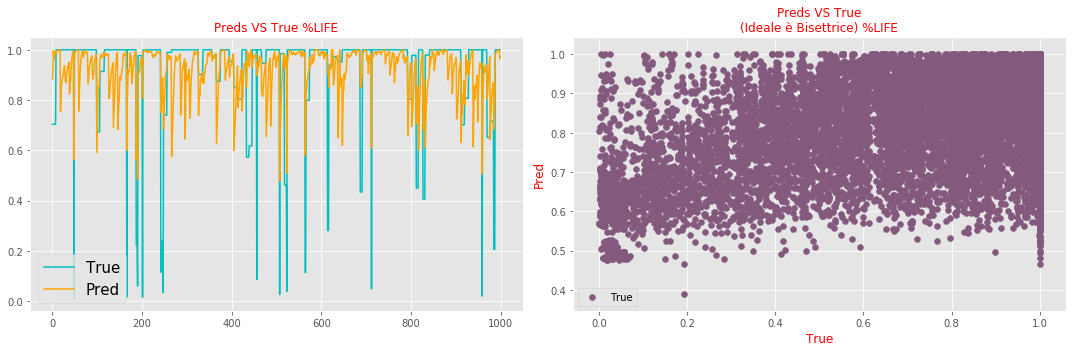

In [0]:
plot_preds_true( ytest_life, winner_1run.model.predict(container_reg['X_test'])[0], task='life', plot_only_reg= False)

In [0]:
####################################################################################################################################à

In [0]:
container_reg['X_test'].head()

,Variant code,Contract Type,Header amount,Main material group qualification flag,Professional services flag,num_orders,%avg_importo,%std_importo,%avg_intervals,%std_intervals,life%,%days_til_first_order,durata_nominale_gg,percentage_used,ordini/mese,True/Ideal Slope,orders_trim_1,orders_trim_2,orders_trim_3,orders_trim_4,initial_trimester,Accel_orders,Accel_%used,%days_from_last_order,VMD Code_FINAL_ENC,QMG Code_FINAL_ENC,Purchase Unit Code_FINAL_ENC,Global Business line_FINAL_ENC,Geographical Area_FINAL_ENC,Supplier Type Code_FINAL_ENC,Purchase document type_FINAL_ENC,Job type_FINAL_ENC,VMD Code_ENC_REG,QMG Code_ENC_REG,Purchase Unit Code_ENC_REG,Global Business line_ENC_REG,Geographical Area_ENC_REG,Supplier Type Code_ENC_REG,Purchase document type_ENC_REG,Job type_ENC_REG
Purchase document,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
EL\5800012947,-1.0,0.0,9.50222,0.0,0.0,-0.2,-0.096874,0.000000,-0.423756,0.000000,-0.8,-0.393796,1.470067,-0.139665,-0.151899,-0.188125,0.000,0.000000,0.000000,0.000,0.5,0.000,0.000000,-0.097488,0.038102,0.581666,0.525055,-0.453677,-0.158305,-0.050022,-0.172944,2.038293,-0.235291,-0.582472,0.374442,0.705215,0.161652,0.053136,0.075349,-1.605616
EL\5800012947,-1.0,0.0,9.50222,0.0,0.0,0.4,0.034786,0.017857,-0.302730,1.225348,-0.6,-0.095388,1.470067,-0.077048,0.898734,0.133389,0.000,0.000000,0.000000,0.000,0.5,1.000,1.184834,1.026341,0.038102,0.581666,0.525055,-0.453677,-0.158305,-0.050022,-0.172944,2.038293,-0.235291,-0.582472,0.374442,0.705215,0.161652,0.053136,0.075349,-1.605616
EL\5800012947,-1.0,0.0,9.50222,0.0,0.0,5.6,0.017173,0.159286,-0.399785,0.581636,-0.4,-0.095388,1.470067,0.384777,4.873418,1.152308,0.172,0.000000,0.000000,0.828,0.5,8.667,8.738152,0.641657,0.038102,0.581666,0.525055,-0.453677,-0.158305,-0.050022,-0.172944,2.038293,-0.235291,-0.582472,0.374442,0.705215,0.161652,0.053136,0.075349,-1.605616
EL\5800012947,-1.0,0.0,9.50222,0.0,0.0,8.0,0.016586,0.149286,-0.394260,0.605238,-0.2,-0.095388,1.470067,0.598231,4.594937,1.071157,0.122,38.285714,0.510638,0.585,0.5,0.462,0.547393,0.008706,0.038102,0.581666,0.525055,-0.453677,-0.158305,-0.050022,-0.172944,2.038293,-0.235291,-0.582472,0.374442,0.705215,0.161652,0.053136,0.075349,-1.605616
EL\5800012947,-1.0,0.0,9.50222,0.0,0.0,11.8,0.022310,0.137857,-0.396788,0.528613,0.0,-0.095388,1.470067,0.994879,5.050633,1.261780,0.083,26.142857,5.319149,0.483,0.5,1.583,2.201422,-0.029391,0.038102,0.581666,0.525055,-0.453677,-0.158305,-0.050022,-0.172944,2.038293,-0.235291,-0.582472,0.374442,0.705215,0.161652,0.053136,0.075349,-1.605616


In [0]:
def results_hand_grid( lista_histories= l, param_grid= param_grid, columns= ['n_layers', 'nodi_hiddens','batch_size', 'dropout', 'Train MAE', 'Test MAE', 'Train RMSE', 'Test RMSE'],
                      task= 'life'):

  iteraz=0
  
  results_emb_1h= pd.DataFrame(columns= columns )

  for diz in list(ParameterGrid(param_grid)):
    res= lista_histories[iteraz][1][task]

    df= pd.DataFrame([
    diz['n_layers'],
    diz['nodi_hiddens'],
    diz['batch_size'],
    diz['dropout'],
    res['Train MAE'],
    res['Test MAE'],
    res['Train RMSE'],
    res['Test RMSE']    ]).T

    df.columns= columns
    
    #print(df)
    results_emb_1h= results_emb_1h.append(df, ignore_index=True)

    iteraz+=1
  return results_emb_1h.sort_values(by= 'Test MAE', ascending= False)

In [0]:
columns= ['n_layers', 'nodi_hiddens','batch_size', 'dropout', 'Train MAE', 'Test MAE', 'Train RMSE', 'Test RMSE']
results_hand_grid( lista_histories= l, param_grid= param_grid, columns= columns, task= 'life')

,n_layers,nodi_hiddens,batch_size,dropout,Train MAE,Test MAE,Train RMSE,Test RMSE
1,2,"[16, 16]",128,0.5,9.044,10.65,15.891,16.588
0,2,"[64, 64]",128,0.5,8.72,9.886,15.516,16.377


In [0]:
columns= ['n_layers', 'nodi_hiddens','batch_size', 'dropout', 'Train MAE', 'Test MAE', 'Train RMSE', 'Test RMSE']
results_hand_grid( lista_histories= l, param_grid= param_grid, columns= columns, task= 'usage')

,n_layers,nodi_hiddens,batch_size,dropout,Train MAE,Test MAE,Train RMSE,Test RMSE
0,2,"[64, 64]",128,0.5,20.119,41.248,27.112,53.649
1,2,"[16, 16]",128,0.5,20.106,40.373,27.302,53.356


### Automated analysis of the error: Finding best model of the Grid Search, seeing prediction error in respect to Nominal Duration and check which contracts have both cosumption and %life low, which are the contraddictory cases.

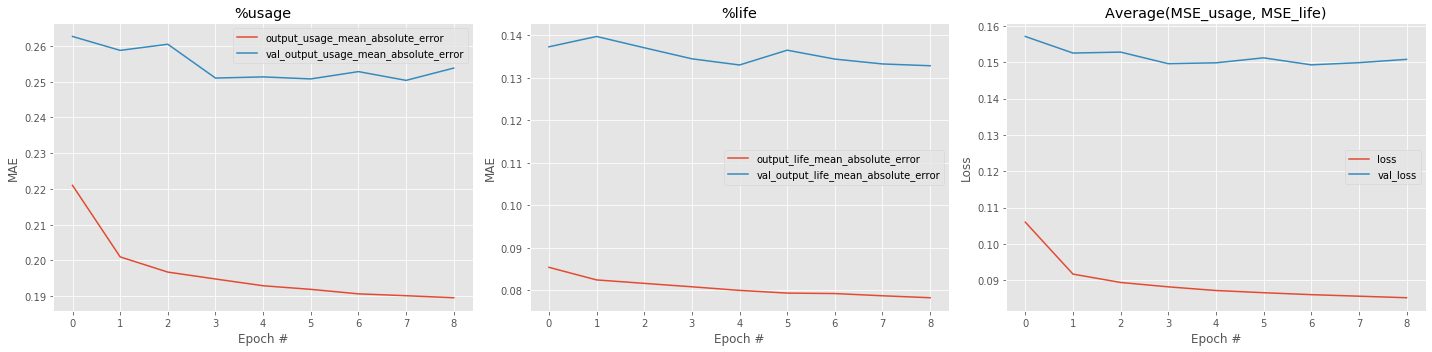

[  n_layers nodi_hiddens batch_size dropout Train MAE Test MAE Train RMSE  \
 1        2     [16, 16]        128     0.5     9.044    10.65     15.891   
 0        2     [64, 64]        128     0.5      8.72    9.886     15.516   
 
   Test RMSE  
 1    16.588  
 0    16.377  ,
   n_layers nodi_hiddens batch_size dropout Train MAE Test MAE Train RMSE  \
 0        2     [64, 64]        128     0.5    20.119   41.248     27.112   
 1        2     [16, 16]        128     0.5    20.106   40.373     27.302   
 
   Test RMSE  
 0    53.649  
 1    53.356  ]

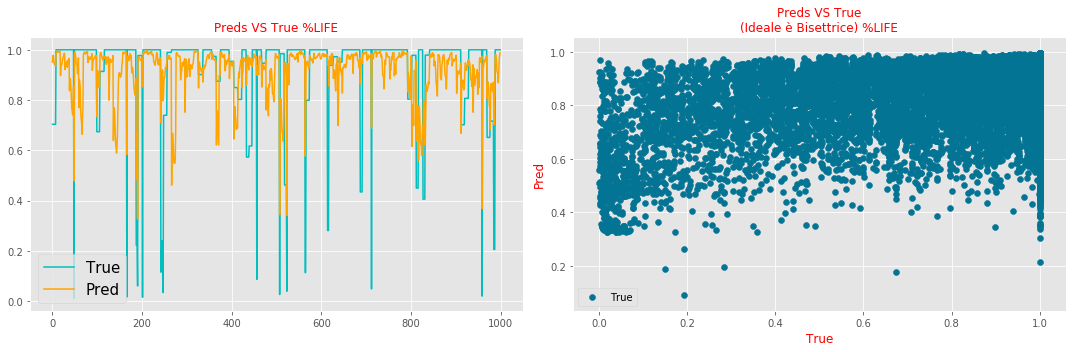

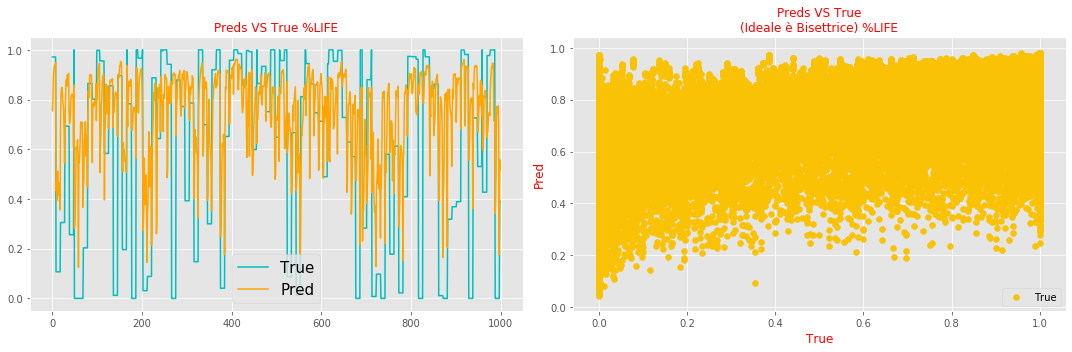

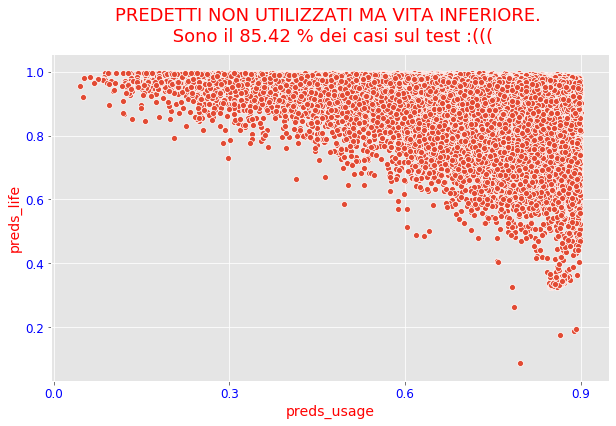

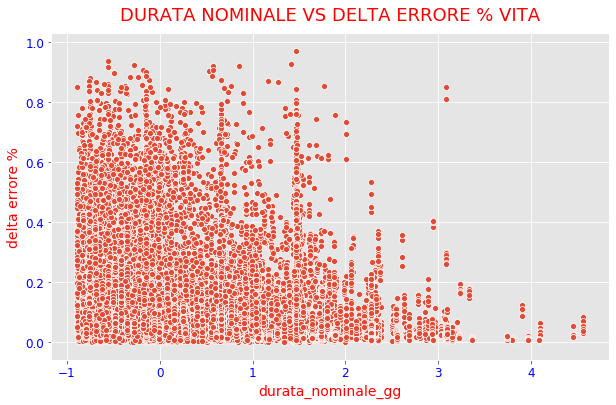

In [0]:
analisi_errore_reg( )

In [0]:
###################################################################################################################